In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pylab import rcParams
import seaborn as sns



%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams.update({'font.size' : 10})

# Train dataset

In [2]:
set_1 = pd.read_csv('train.csv')
set_1.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
set_1.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [4]:
df1 = set_1

### Анализ тренировочных данных

In [5]:
# заменяем данные столбцов Ecology_2,Ecology_3,Shops_2 на бинарные значения
df1 = df1.replace('A',0)
df1 = df1.replace('B',1)

In [6]:
# Удаляем не нужный, на мой взгляд, столбец
df1 = df1.drop('Id', axis = 1)

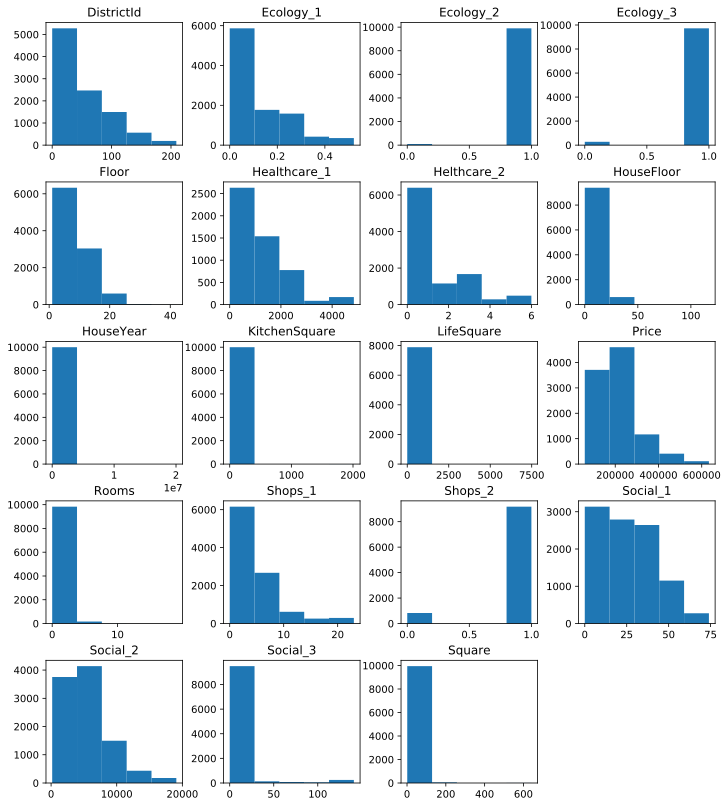

In [7]:
# Гистораммы всех признаков
df1.hist(figsize =(12,14), bins = 5, grid = False)
plt.show()

In [8]:
# DistrictId - Есть районы с ид 0, но если посмотреть на показатели условий жизни(Ecology,Social,Healthcare)
# то мы видим, что они равны/похожи > будем считать, что район под № 0 действительно сущесвует
df1[df1['DistrictId'] == 0].head()
# Также выведем медиальные значения цен по каждому району
price_district_median = df1.groupby('DistrictId')[['Price']].median().reset_index()
price_district_median.head()

,DistrictId,Price
0,0,165963.054142
1,1,183663.443595
2,2,208539.501373
3,3,169094.013281
4,4,278639.482329


In [9]:
# Выведем новый признак, соединив полученный дф с тренировочным
df1 = pd.merge(df1,price_district_median, how = 'left', on = 'DistrictId')
df1.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_x,Price_y
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730,203602.408898
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063,210694.850106
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524,245978.794474
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217,151557.904767
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644,178829.166450


In [10]:
# Square & Lifesquare
# Встречаются непропорциональные или абсурдные значения в наблюдения
# 0.8 - произвольный коэффициент для соразмерности прощадей
df1.LifeSquare = df1.LifeSquare.fillna(df1.LifeSquare.median())
df1.loc[(df1['Square'] > df1['LifeSquare']) | (df1['Square'] < df1['LifeSquare']), 'LifeSquare'] = df1.Square * 0.8

In [11]:
# Редактируем признак Rooms
df1.loc[(df1['Rooms'] == 0) & (df1['Square'] > 100), 'Rooms'] = 2
df1.loc[(df1['Rooms'] == 0) & (df1['Square'] < 100), 'Rooms'] = 1

In [12]:
# KitchenSquare = 0 трогать не будем > кухни попросту может не быть
# А вот df1[df1['KitchenSquare'] > 123] будем
df1.loc[df1['KitchenSquare'] > 123, 'KitchenSquare'] = df1.KitchenSquare.median()
# df1[df1['KitchenSquare'] == 0] выдает 689 квартир без кухни.Вполне реально

In [13]:
# У нас есть 268 домов с df1[df1['HouseFloor'] == 0]. Предположим, что это частные одноэтажные дома
df1.loc[df1['HouseFloor'] == 0, 'HouseFloor'] = 1

In [14]:
# HouseYear невозможные значения заменим на медиану
df1[df1['HouseYear'] < 1500]
df1.loc[(df1['HouseYear'] < 1500) | (df1['HouseYear'] > 2020), 'HouseYear'] = df1.HouseYear.median()

In [15]:
# Заменим пропущенные значения Healthcare_1 средним значением, т.к. это какой-то коэф
df1.Healthcare_1 = df1.Healthcare_1.fillna(df1.Healthcare_1.mean())

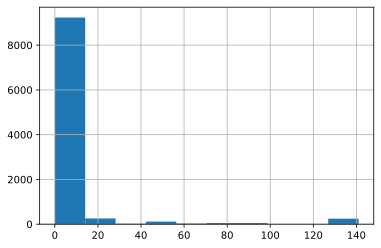

In [16]:
df1.Social_3.hist()
# Этот признак представляет из себя какой-то коэф, но гистограмма значений очень странная
# Оставим пока как есть
plt.show()
# Нулевые значения признаков Ecology,Social,Healthcare пока оставим как есть, может это промзона к примеру

### Финальная проверка корректности данных

In [17]:
df1.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_x,Price_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.891500,56.315775,45.052620,5.876100,8.526700,12.63630,1984.863800,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399,201916.213502
std,43.587592,0.838092,21.058732,16.846985,5.174014,5.241148,6.72767,18.409979,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,736.734238,1.493601,4.806341,0.275139,92872.293865,54733.929415
min,0.000000,1.000000,1.136859,0.909487,0.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,113789.561738
25%,20.000000,1.000000,41.774881,33.419905,1.000000,4.000000,9.00000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942,168980.370846
50%,36.000000,2.000000,52.513310,42.010648,6.000000,7.000000,13.00000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1142.904460,1.000000,3.000000,1.000000,192269.644879,189439.609358
75%,75.000000,2.000000,65.900625,52.720500,9.000000,12.000000,17.00000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1142.904460,2.000000,6.000000,1.000000,249135.462171,223672.304810
max,209.000000,19.000000,641.065193,512.852154,123.000000,42.000000,117.00000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,526438.458919


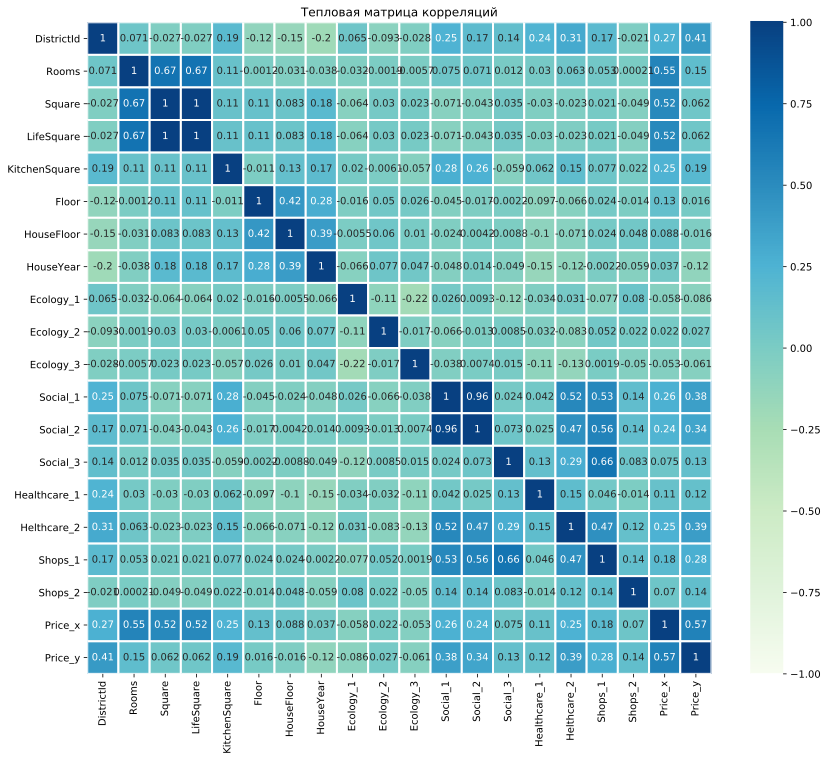

In [18]:
# Строим тепловую матрицу корреляций
plt.rcParams['figure.figsize'] = (14.0, 12.0)
sns.heatmap(df1.corr(), annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0, linewidths = 2, cmap = 'GnBu')
plt.title('Тепловая матрица корреляций')
plt.show()
# Тут можно смело удалять один из столбцов Social_1/Social_2
# Удаляем Social_1 из-за присутствия нулевых значений
# Также можно удалить LifeSquare

In [19]:
# Удаляем столбцы 
df1 = df1.drop(['Social_1','LifeSquare','DistrictId'], axis = 1)
df1.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_x,Price_y
0,2.0,47.981561,6.0,7,9.0,1969.0,0.089040,1,1,7976,5,1142.90446,0,11,1,184966.930730,203602.408898
1,3.0,65.683640,8.0,7,9.0,1978.0,0.000070,1,1,10309,1,240.00000,1,16,1,300009.450063,210694.850106
2,2.0,44.947953,0.0,8,12.0,1968.0,0.049637,1,1,7759,0,229.00000,1,3,1,220925.908524,245978.794474
3,2.0,53.352981,9.0,8,17.0,1977.0,0.437885,1,1,5735,3,1084.00000,0,5,1,175616.227217,151557.904767
4,1.0,39.649192,7.0,11,12.0,1976.0,0.012339,1,1,5776,1,2078.00000,2,4,1,150226.531644,178829.166450


In [20]:
# разделяем на датафрейм и массив целевой переменной
df1_price = df1.Price_x.values
df1 = df1.drop('Price_x', axis = 1)
df1_price

array([184966.93072984, 300009.45006273, 220925.90852358, ...,
       159143.8053701 , 181595.3398081 , 218714.0776153 ])

In [21]:
df1.describe()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.891500,56.315775,5.876100,8.526700,12.63630,1984.863800,0.118858,0.990300,0.972500,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,201916.213502
std,0.838092,21.058732,5.174014,5.241148,6.72767,18.409979,0.119025,0.098015,0.163543,4006.799803,23.831875,736.734238,1.493601,4.806341,0.275139,54733.929415
min,1.000000,1.136859,0.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113789.561738
25%,1.000000,41.774881,1.000000,4.000000,9.00000,1974.000000,0.017647,1.000000,1.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,168980.370846
50%,2.000000,52.513310,6.000000,7.000000,13.00000,1977.000000,0.075424,1.000000,1.000000,5285.000000,2.000000,1142.904460,1.000000,3.000000,1.000000,189439.609358
75%,2.000000,65.900625,9.000000,12.000000,17.00000,2001.000000,0.195781,1.000000,1.000000,7227.000000,5.000000,1142.904460,2.000000,6.000000,1.000000,223672.304810
max,19.000000,641.065193,123.000000,42.000000,117.00000,2020.000000,0.521867,1.000000,1.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,526438.458919


# Test dataset

In [22]:
test_set = pd.read_csv('test.csv')
test_set.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [23]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [24]:
test_wId = test_set
test_set = test_set.drop('Id', axis = 1)

In [25]:
test_set.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Анализ тестовых данных

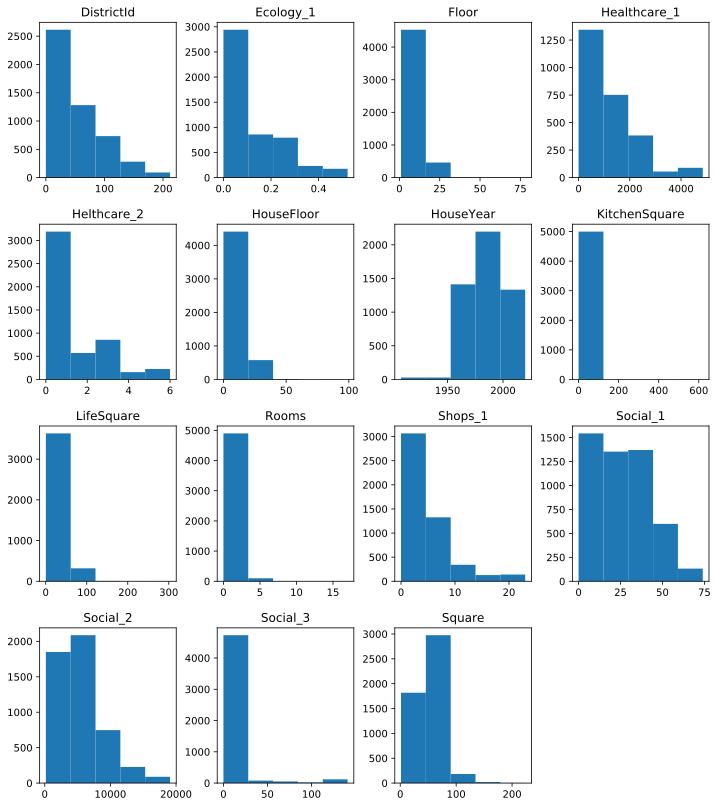

In [26]:
# Гистораммы всех признаков
test_set.hist(figsize =(12,14), bins = 5, grid = False)
plt.show()

In [27]:
# Выведем новый признак, соединив price_district_median и тестовый датасет
test_set = pd.merge(test_set,price_district_median, how = 'left', on = 'DistrictId')

In [28]:
test_set.rename(columns = {'Price' : 'Price_y'}, inplace = True)
test_set.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_y
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,151557.904767
1,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,195610.960042
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,526438.458919
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,196429.659238
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,146171.433190


In [29]:
test_set.Price_y.isnull().sum()
test_set.loc[test_set['Price_y'].isnull(), 'Price_y'] = test_set.Price_y.median()

In [30]:
# Перегоняем обджективы в бинарные
test_set = test_set.replace('A',0)
test_set = test_set.replace('B',1)

In [31]:
# Редактируем признак Rooms
test_set.loc[(test_set['Rooms'] == 0) & (test_set['Square'] > 100), 'Rooms'] = 2
test_set.loc[(test_set['Rooms'] == 0) & (test_set['Square'] < 100), 'Rooms'] = 1

In [32]:
# Square & Lifesquare
# 0.8 - произвольный коэффициент для соразмерности прощадей
test_set.LifeSquare = test_set.LifeSquare.fillna(test_set.LifeSquare.median())
test_set.loc[(test_set['Square'] > test_set['LifeSquare']) | (test_set['Square'] < test_set['LifeSquare']), 'LifeSquare'] = test_set.Square * 0.8

In [33]:
# KitchenSquare, одновременно заполняем пробелы и редактируем аномалии
test_set.loc[(test_set['KitchenSquare'] == 0) | (test_set['KitchenSquare'] > test_set['LifeSquare']), 'KitchenSquare'] = test_set.LifeSquare * 0.2

In [34]:
# HouseFloor
test_set.loc[test_set['HouseFloor'] == 0, 'HouseFloor'] = 1

In [35]:
# Заменим пропущенные значения Healthcare_1 средним значением, т.к. это какой-то коэф
test_set.Healthcare_1 = test_set.Healthcare_1.fillna(test_set.Healthcare_1.mean())

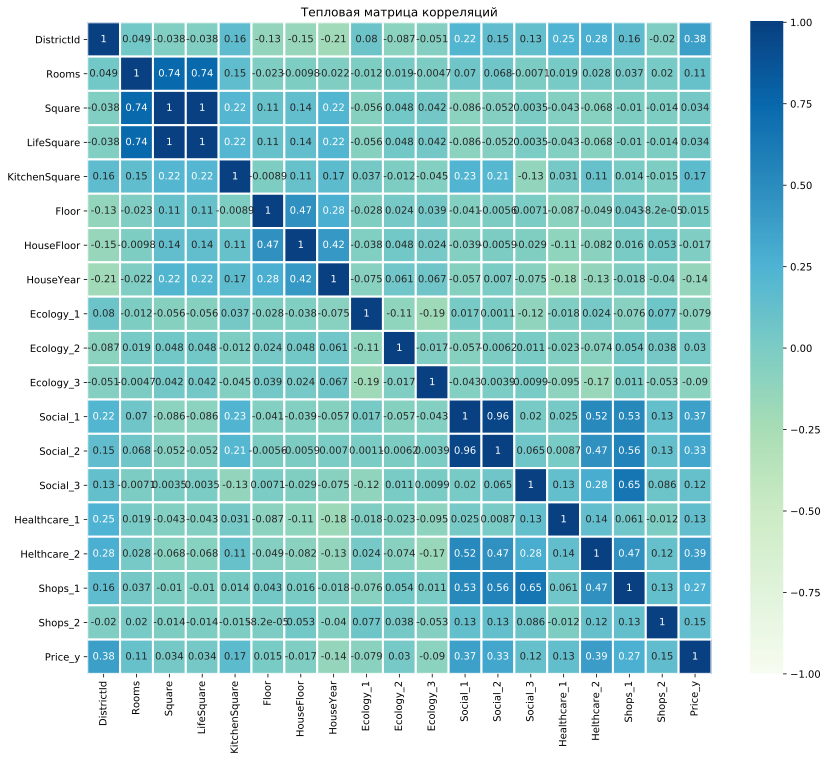

In [36]:
plt.rcParams['figure.figsize'] = (14.0, 12.0)
sns.heatmap(test_set.corr(), annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0, linewidths = 2, cmap = 'GnBu')
plt.title('Тепловая матрица корреляций')
plt.show()

In [37]:
# Удаляем столбцы 
test_set = test_set.drop(['Social_1','LifeSquare','DistrictId'], axis = 1)
test_set.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_y
0,2.0,49.882643,6.000000,6,14.0,1972,0.310199,1,1,2748,1,1146.657263,0,0,1,151557.904767
1,2.0,69.263183,1.000000,6,1.0,1977,0.075779,1,1,1437,3,1146.657263,0,2,1,195610.960042
2,1.0,13.597819,2.175651,2,5.0,1909,0.000000,1,1,7538,87,4702.000000,5,5,1,526438.458919
3,2.0,73.046609,9.000000,22,22.0,2007,0.101872,1,1,4583,3,1146.657263,3,3,1,196429.659238
4,1.0,47.527111,1.000000,17,17.0,2017,0.072158,1,1,629,1,1146.657263,0,0,0,146171.433190


In [38]:
test_set.shape

(5000, 16)

In [39]:
df1.shape

(10000, 16)

In [40]:
df1.isnull().sum()

Rooms            0
Square           0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price_y          0
dtype: int64

In [41]:
test_set.isnull().sum()

Rooms            0
Square           0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price_y          0
dtype: int64

In [42]:
df1.describe()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.891500,56.315775,5.876100,8.526700,12.63630,1984.863800,0.118858,0.990300,0.972500,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,201916.213502
std,0.838092,21.058732,5.174014,5.241148,6.72767,18.409979,0.119025,0.098015,0.163543,4006.799803,23.831875,736.734238,1.493601,4.806341,0.275139,54733.929415
min,1.000000,1.136859,0.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113789.561738
25%,1.000000,41.774881,1.000000,4.000000,9.00000,1974.000000,0.017647,1.000000,1.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,168980.370846
50%,2.000000,52.513310,6.000000,7.000000,13.00000,1977.000000,0.075424,1.000000,1.000000,5285.000000,2.000000,1142.904460,1.000000,3.000000,1.000000,189439.609358
75%,2.000000,65.900625,9.000000,12.000000,17.00000,2001.000000,0.195781,1.000000,1.000000,7227.000000,5.000000,1142.904460,2.000000,6.000000,1.000000,223672.304810
max,19.000000,641.065193,123.000000,42.000000,117.00000,2020.000000,0.521867,1.000000,1.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,526438.458919


In [43]:
test_set.describe()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price_y
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,1.910600,56.449500,6.378767,8.632000,12.627200,1984.392600,0.119874,0.990400,0.970200,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.917600,202154.261448
std,0.837823,19.092787,3.853612,5.483228,6.742293,18.573149,0.120070,0.097518,0.170052,4026.614773,23.863762,756.632091,1.47994,4.777365,0.275001,52764.828391
min,1.000000,1.378543,1.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,113789.561738
25%,1.000000,41.906231,5.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000,168980.370846
50%,2.000000,52.921340,6.624390,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,5285.000000,2.000000,1146.657263,1.00000,3.000000,1.000000,191511.468287
75%,2.000000,66.285129,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,7287.000000,5.000000,1146.657263,2.00000,6.000000,1.000000,223707.512001
max,17.000000,223.453689,42.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,526438.458919


In [244]:
# Сохраним данные
df1.to_csv('train_prepared.csv')
test_set.to_csv('test_prepared.csv')

# Построение Модели

In [44]:
# разделяем на тренировочный и валидный сеты
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df1,df1_price, test_size = 0.3, random_state = 45)

In [45]:
# GridSearchCV для подбора наилучщих параметров
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

"""
parameters = {
    'n_estimators' : range(180,230,10),
    'max_features' : np.arange(5,10),
    'max_depth' : np.arange(18,24)
}

clf = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid= parameters,
    scoring = 'r2',
    cv = 5
)

clf.fit(X_train,y_train) 
clf.best_params_

"""

"\nparameters = {\n    'n_estimators' : range(180,230,10),\n    'max_features' : np.arange(5,10),\n    'max_depth' : np.arange(18,24)\n}\n\nclf = GridSearchCV(\n    estimator = RandomForestRegressor(),\n    param_grid= parameters,\n    scoring = 'r2',\n    cv = 5\n)\n\nclf.fit(X_train,y_train) \nclf.best_params_\n\n"

In [51]:
rfg = RandomForestRegressor(max_depth = 17, max_features = 7, n_estimators =  220)

In [52]:
# Это для трейна и валида по df1
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_valid)
r2_score(y_valid, y_pred)

0.7524466754954868

In [53]:
# это для всего df1
rfg.fit(df1, df1_price)
y_pred = rfg.predict(df1)
r2_score(df1_price, y_pred)

0.9561332677879006

In [149]:
# Обучаем модель на тестовых данных
y_pred_test = rfg.predict(test_set)

In [150]:
y_pred_test

array([160604.38703903, 232073.31180331, 335912.53875625, ...,
       335894.37291383, 205104.43378772, 177031.74542694])

In [61]:
test_wId['Price'] = y_pred_test
test_wId[['Id','Price']].to_csv('KochetkovMD_predictions.csv', index = False)